# Autoregression Models

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems.

## Autocorrelation

An autoregression model makes an assumption that the observations at current and previous time steps are useful to predict the value at the next time step. This relationship between variables is called correlation. If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various di↵erent lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling. Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

The correlation statistics can also help to choose which lag variables will be useful in a model and which will not. Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

## Quick Check for Autocorrelation

There is a quick, visual check that we can do to see if there is an autocorrelation in our time series dataset. We can plot the observation at the current time step (t) with the observation at the previous time step (t-1) as a scatter plot. This could be done manually by first creating a lag version of the time series dataset and using a built-in scatter plot function in the Pandas library.

Pandas provides a built-in plot to do exactly this, called the lag plot() function.

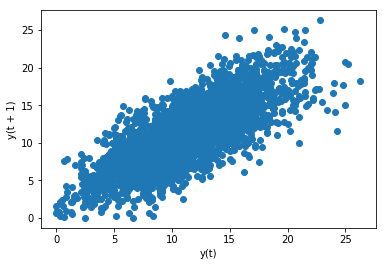

In [4]:
# lag plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot

series = read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0], 
                  index_col = 0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)
lag_plot(series)
pyplot.show()

We can see a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation. This process could be repeated for any other lagged observation, such as if we wanted to review the relationship with the last 7 days or with the same day last month or last year. Another quick check that we can do is  to directly calculate the correlation between the observation and the lag variable.

We can use a statistical test like the Pearson correlation coe cient. This produces a number to summarize how correlated two variables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low correlation and high values above 0.5 or below -0.5 showing high correlation.

Correlation can be calculated easily using the corr() function2 on the DataFrame of the
lagged dataset. The example below creates a lagged version of the Minimum Daily Temperatures dataset and calculates a correlation matrix of each column with other columns, including itself.


In [6]:
# Correlation of lag=1
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0], 
                  index_col = 0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


This is a good confirmation for the plot above showing a strong positive correlation between the observation and the lag=1 value.

## Autocorrelation Plots

We can plot the correlation coe cient for each lag variable. This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time. We could manually calculate the correlation values for each lag variable and plot the result.

The plot provides the lag number along the x-axis and the correlation coe cient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

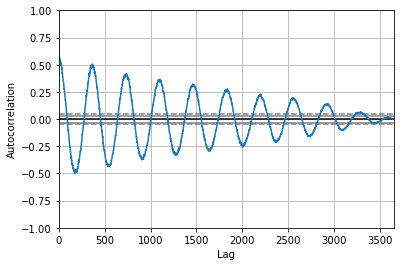

In [8]:
# Autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

series = read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0], 
                  index_col = 0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

autocorrelation_plot(series)
pyplot.show()

Plot shows the swing in postitive and negatie correlation as the temperature values change across summer and winter seasons each previous year. 

The statsmodels library also provides a version of the plot in the plot_acf() function as a line plot:

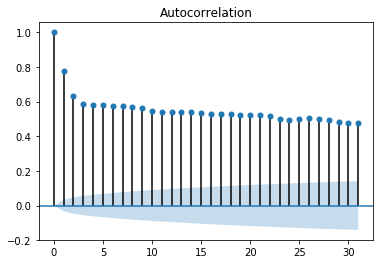

In [11]:
# Autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

series = read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0], 
                  index_col = 0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)
plot_acf(series, lags=31)
pyplot.show()

## Persistence Model
Develop a model to predict the last 7 days of minimum temperatures in the dataset given all prior observations. Simplest model that could make predictions would be to persist the last observation. 

A test harness for teh problem can be developed by splitting the observations into training and test sets with only the last 7 observations in the dataset assigned to the the set as unseen data that you wish to predict. Predictions are made using a walk-forward validation model so that you can persist the most recent observations for the next day. This means that you are not making a 7-day forecast but 7 1-day forecasts.

Test RMSE: 1.850


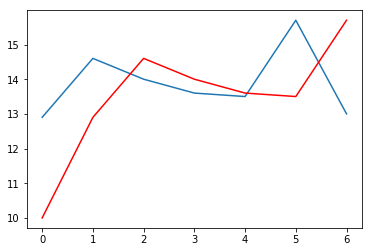

In [16]:
# Evaluate a persistence model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot 
from sklearn.metrics import mean_squared_error
from math import sqrt

#Load data
series = read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0], 
                  index_col = 0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

#Create Lagged Data Set
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets; 7 day forecast
X = dataframe.values
train, test = X[1:len(X) - 7], X[len(X)-7:]
train_x, train_y = train[:,0], train[:,1]
test_x, test_y = test[:,0], test[:,1]

#persistence model
def model_persistence(x):
    return x

#walk-forward validation
predictions = list()
for x in test_x:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

#plot prediction vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color = 'red')
pyplot.show()

## Autoregression Model

An autoregression model is a linear regression model that uses lagged variables as input variables. We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use. Alternately, the Statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class.

We can use this model by first creating the model AR() and then calling fit() to train it on our dataset. This returns an ARResult object6. Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future. This creates 1 7-day forecast, which is different from the persistence example above.

Lag: 29
Coefficients: [  5.57543506e-01   5.88595221e-01  -9.08257090e-02   4.82615092e-02
   4.00650265e-02   3.93020055e-02   2.59463738e-02   4.46675960e-02
   1.27681498e-02   3.74362239e-02  -8.11700276e-04   4.79081949e-03
   1.84731397e-02   2.68908418e-02   5.75906178e-04   2.48096415e-02
   7.40316579e-03   9.91622149e-03   3.41599123e-02  -9.11961877e-03
   2.42127561e-02   1.87870751e-02   1.21841870e-02  -1.85534575e-02
  -1.77162867e-03   1.67319894e-02   1.97615668e-02   9.83245087e-03
   6.22710723e-03  -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


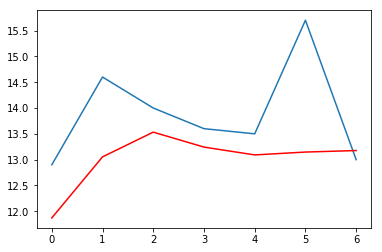

In [19]:
# Create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

#Load Data
series = read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0], 
                  index_col = 0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

#split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

#train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

#make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' % rmse)

#plot results
pyplot.plot(test)
pyplot.plot(predictions, color = 'red')
pyplot.show()

Running the example first prints the chosen optimal lag and the list of coe cients in the trained linear regression model. We can see that a 29-lag model was chosen and trained. This is interesting given how close this lag is to the average number of days in a month. The 7 day forecast is then printed and the root mean squared error of the forecast is summarized.

The Statsmodels API does not make it easy to update the model as new observations become available. One way would be to re-train the AR model each day as new observations become available, and that may be a valid approach, if not computationally expensive. An alternative would be to use the learned coe cients and manually make predictions. This requires that the history of 29 prior observations be kept and that the coe cients be retrieved from the model and used in the regression equation to come up with new forecasts.
The coe cients are provided in an array with the intercept term followed by the coe cients for each lag variable starting at t to t-n. We simply need to use them in the right order on the history of observations, as follows:

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test RMSE: 1.204


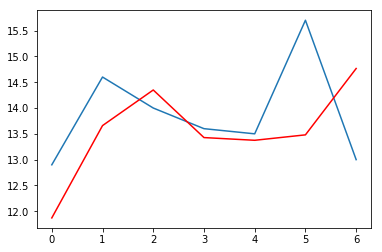

In [25]:
# Create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

#load dataset
series = read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0], 
                  index_col = 0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

#split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

#train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

#walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#plot
pyplot.plot(test)
pyplot.plot(predictions, color = 'red')
pyplot.show()